# 02807: Project 1
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as a Google Colab notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* This project is due on Monday, November 2, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python.
* For each question you should use exactly the cells provided for your solution
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 105.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 105/3=35 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$

* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4, which are both wrong. Then Ann's grade is calculated as follows:

  * $\text{individual-part}(Ann) = \frac{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5}{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5 + 10 + 10} = \frac{45}{65} = 0.692$

  * $\text{group-part} = \frac{85}{105} = 0.809$

  * $\text{grade}(Ann) =  7.14$


# Group declaration table 

This table must be filled before submission.



In [26]:
import pandas as pd

d = {'Exercise 1' : ["", "", "", "", "", ""], 
     'Exercise 2' : ["", "", "", "", "", ""],
     'Exercise 3' : ["", "", "", "", "", ""], 
     'Exercise 4' : ["", "", "", "", "", ""],
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2','Part 3','Part 4','Part 5','Part 6']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,,,,
Part 6,,,,


# Introduction to the Datasets

![link text](https://ph-files.imgix.net/069dd825-cddf-4048-adde-8e81396c2c68?auto=format)


You will be working with datasets obtained through the [The Movie Database (TMDb) API](https://developers.themoviedb.org/3/getting-started/introduction). The first dataset is part of the MovieLens Latest Full Dataset, comprising 26 million ratings on 45.000 movies from 27.000 users. Let's look at the features in this dataset.

**Features**

* **adult**: Indicates if the movie is X-Rated.
* **belongs_to_collection**: A stringified dictionary with info on the movie series a particular film belongs to (e.g.: Lord of the Rings).
* **budget**: The movie budget in dollars.
* **genres**: A stringified list of dictionaries describing all genres associated with the movie.
* **homepage**: The movie's official homepage.
* **id**: An identifier for the movie.
* **imdb_id**: IMDB's identifier for the movie.
* **original_language**: The language in which the movie was shot.
* **original_title**: The original title of the movie.
* **overview**: A brief text about the movie.
* **popularity**: A Popularity Score given by TMDb.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with making of the movie.
* **production_countries**: A stringified list of countries in which the movie was produced.
* **release_date**: Release date of the movie in theaters.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of languages spoken in the film.
* **status**: The status of the movie (Released, To Be Released, etc.)
* **tagline**: The movie's tagline.
* **title**: The official title of the movie.
* **video**: Indicates whether there is a video of the movie in TMDb.
* **vote_average**: The average rating of the movie, on a 0-10 scale.
* **vote_count**: The number of votes by users, as counted by TMDb.

# Imports

First, let's make sure to import Pandas and NumPy. 

In [27]:
import pandas as pd 
import numpy as np

# Exercise 1: Loading, preprocessing and cleaning the data (15 points)

Read the movie dataset from the following URL.

In [28]:
url = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/movies_metadata.csv'

## Part 1: Reading and preprocessing the data (10 pts)

Sometimes, raw data read from a file will be treated by default as string data. For example, the `genres` field in our dataset would be loaded by default as a stringified list of dictionaries. 

If we load this data as a string, we won't be able to access it conveniently. Some preprocessing step is therefore needed.

Write a function `load_movies_data()` that reads the URL into a Pandas DataFrame and preprocesses its columns to ensure that:

1. Data in the `release_date` field consists of Pandas `Timestamp` objects, except for missing values. For example, executing a code cell with `df.release_date[0]` should display the output `Timestamp('1995-10-30 00:00:00')`.

2. Data in the `belongs_to_collection` consists of Python dictionaries.

3. Data in the `genres`, `production_companies` and `production_countries` fields should consist of lists of Python dictionaries. 

For example, executing a code cell with `df.genres[0]` should display the output 
```
[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]
```
Note that that is a list object, not a string. The elements of the list are dictionaries (executing `df.genres[0][0]['name']` returns `'Animation'`). 

*Hint*: for items 2 and 3, you could use `ast.literal_eval`.

Do not loop explicitly over the rows of the DataFrame to perform these preprocessing steps. These format conversions can be performed more efficiently using Pandas' in-built functions and/or calling Pandas' `apply()`with appropriate arguments. You'll be asked below to time the loading and preprocessing step.

In [29]:
from ast import literal_eval
# pre-processing is done in function
def load_movies_data(file):
  df = pd.read_csv(file)
  
  # This function converts the elements in the release_date feature to timestamps if they are not null.
  # If a string is not null but is not of length 10 (like the other strings) it is converted to null.
  df.release_date = df.release_date.apply(lambda x: x if pd.isnull(x) else (np.nan if len(x)!=10 else pd.Timestamp(x)))

  # These functions convert the following features to a list of dictionaries if it's not null (nan):
  # belongs_to_collection, genres, production_companies, and production_countries
  df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.genres = df.genres.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.production_companies = df.production_companies.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.production_countries = df.production_countries.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)

  return df

Now call `load_movies_data()` and load the data into a DataFrame `df`.

In [30]:
df = load_movies_data(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Display the DataFrame. You should check that it looks correct.

In [31]:
df.info
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## Part 2: Timing your function (2.5 pts)

Time the performance of your function. To get the points for this part, the time reported below must not exceed 60 seconds.

In [32]:
load_time = %timeit -o -r 3 load_movies_data(url)
print("Time (s):", load_time.best)

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1057: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  time_number = timer.timeit(number)
/usr/lib/python3.6/timeit.py:206: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  t = self.timeit(number)


1 loop, best of 3: 5.65 s per loop
Time (s): 5.6494447380000565


## Part 3: Cleaning the data (2.5 pts)

Filter/drop all rows meeting any of these conditions:
* The `adult` value is not `'False'`
* The `vote_count` value is missing
* The `vote_average` value is missing

Do not loop over rows to perform these checks. Use Pandas' in-built functionality to do so. 

In [33]:
df = df[(df.adult !='False') | (pd.notna(df.vote_count)) | (pd.notna(df.vote_average))]

# Exercise 2: Computing IMDb's ratings (35 points)

The Top Rated 250 titles in IMDb are calculated using [a formula](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) that takes into account the number of votes that a title has received, the minimum votes required to be on the list, and the mean vote for all titles. The rating for a title is given as follows:

$$ \text{weighted rating } = \left(\frac{v}{v+m} \cdot R\right) + \left(\frac{m}{v+m} \cdot C\right)$$

Where:

$m$ = the minimum number of votes required to be listed in the Top Rated ranking. We'll let $m=1000$.

$v$ = the number of votes received by the title (the title's **`vote_count`** value)

$R$ = the average rating for the title (the title's **`vote_average`** value)

$C$ = the mean vote across the whole list (the mean over the **`vote_average`** column)

We are going to compute the ratings for movies that could be listed in IMDb's Top Rated 250 ranking.  We want to do this as efficiently as possible. As a baseline for benchmarking, we'll use a non-optimised solution that simply loops over the rows of the dataset and computes the weighted rating for the corresponding movie, if the movie has more than 1000 votes. 

In [34]:
C = df['vote_average'].mean()
m = 1000

def weighted_rating(row):
  if row['vote_count'] > m:
    v = row['vote_count']
    R = row['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)
  else:
    return np.nan

def weighted_rating_loop(df):
  rating_list = []
  for i in range(0, len(df)):
    rating = weighted_rating(df.iloc[i])
    rating_list.append(rating)
  df['imdb_rating'] = rating_list

In [35]:
weighted_rating_loop(df)

Let's look at the average performance of this function:

In [36]:
basic_time = %timeit -r 3 -o weighted_rating_loop(df)
print("Best time:", basic_time.best)
avgBasic = np.array(basic_time.all_runs).mean()
print("Avg. time:", avgBasic)

1 loop, best of 3: 10.5 s per loop
Best time: 10.45611087799989
Avg. time: 10.719876844666638


In the remaining parts of the exercise, you are going to be asked to come up with alternative ways to compute the ratings, using various methodologies. Let's create a score board to keep track of performance. Here's a description of the rows:

*   **Best single run time (s)**:  The best time used by your solution, in seconds.
*   **Marginal performance improvement**: The time improvement of your current solution over its immediately preceding solution. Given by: $\frac{\text{average single run time (s) of previous solution}}{\text{average single run time (s) of current solution}}$
*   **Performance improvement over basic looping**:  The time improvement over our baseline solution. Given by: $\frac{\text{average single run time (s) of weighted_rating_loop}}{\text{average single run time (s) of current solution}}$
*   **Best single run time (s, teacher)**: The time of a solution provided by the teacher. 
*   **Marginal performance improvement (teacher)**: The time improvement of the teacher's solution over its immediately preceding solution. 
*   **Performance improvement over basic looping (teacher)**:  The teacher's solution improvement over the baseline solution.



In [37]:
timing_data = {
        'Best single run time (s)': [basic_time.best,np.nan, np.nan, np.nan,np.nan],
        'Marginal performance improvement': [np.nan,np.nan, np.nan, np.nan,np.nan],
        'Performance improvement over basic looping': np.nan,
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x1.87', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,10.456111,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,NaN,NaN,NaN,6.13000,x2.01,x1.87
Apply(),NaN,NaN,NaN,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


**The grading for the following parts works as follows.**

Let $m$ be the marginal performance improvement for the teacher's solution over basic looping, and let $m'$ be the marginal performance improvement for your solution over `basic_time`. If a part gives $n$ points, then you will get the $n$ points if $m' \geq 0.5 m$, and 0 points otherwise.

You don't get extra points for performing faster than the teacher's solution. But this is of course possible and you should feel free to optimise away as much as you want!

## Part 1: Less bad looping with `iterrows` (2.5 pts)

Define a function `weighted_rating_iterrows(df)` that computes the ratings by looping over rows with the in-built iterator `iterrows`, and stores the results in a new column of the DataFrame called called `imdb_rating_iter`.

In [38]:
def weighted_rating_iterrows(df):
  # define parameters, and create an empty list
  m = 1000
  C = df['vote_average'].mean()
  imdb_rating_iter = []
  # iterate through with iterrows
  for index, row in df.iterrows():
    # check the vote count for current row
    v = row['vote_count']
    if v > m:
      # if the check holds, calculate the rating and append it
      R = row['vote_average']
      rate = (v/(v+m)*R) + (m/(v+m)*C)      
      imdb_rating_iter.append(rate)
    else:
      # else input a nan
      imdb_rating_iter.append(np.nan)
      
  # Define a column in the dataframe with the rating
  df['imdb_rating_iter'] = imdb_rating_iter

Call the function and make sure that it works as intended.

In [39]:
weighted_rating_iterrows(df)
# We use the equals function to check if we have calculated the same ratings as the teacher.
df['imdb_rating_iter'].equals(df.imdb_rating)

True

Time the performance of the function.

In [40]:
iterrows_time = %timeit -r 3 -o weighted_rating_iterrows(df)
print("Best time:", iterrows_time.best)
# To find the average time, we put the time from all runs into an array and get the mean.
avgIter = np.array(iterrows_time.all_runs).mean()
print("Avg. time:", avgIter)

# These are defined for easier input into the table
Marg1 = np.divide(avgBasic,avgIter)
Perf1 = np.divide(avgBasic,avgIter)

1 loop, best of 3: 4.57 s per loop
Best time: 4.567091003000314
Avg. time: 4.693015029333462


Update the score board with the average time, marginal and overall performance change you have obtained. Display the updated table below. 

In [41]:
timing_data = {
        'Best single run time (s)': [basic_time.best,iterrows_time.best, np.nan, np.nan,np.nan],
        'Marginal performance improvement': [np.nan, Marg1, np.nan, np.nan,np.nan],
        'Performance improvement over basic looping': [np.nan, Perf1, np.nan, np.nan,np.nan],
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x1.87', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,10.456111,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,4.567091,2.28422,2.28422,6.13000,x2.01,x1.87
Apply(),NaN,NaN,NaN,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


## Part 2: Using `apply()`. (5 pts)

Define a function `weighted_rating_apply(df)` that computes the ratings using Pandas' `apply()` function, and stores the results in a new column of the DataFrame called `'imdb_rating_apply`.

In [42]:
def weighted_rating_apply(df):
  # Define the parameters
  m = 1000
  R = 'vote_average'
  v = 'vote_count'
  C = df['vote_average'].mean()

  # Using a function to calculate the ratings and also to do the vote count check
  def calc_rating(x):
        if x[v] > m:
            return x[v]/(x[v]+m)*x[R]+(m/(x[v]+m))*C
        else:
            return np.nan

  # use the apply function to do the calculation
  df['imdb_rating_apply'] = df.apply(lambda x: calc_rating(x), axis=1)
  
 

Call the function and make sure that it works as intended.

In [43]:
weighted_rating_apply(df) 
df['imdb_rating_apply'].equals(df.imdb_rating)

True

Time the performance of the function.

In [44]:
apply_time = %timeit -r 3 -o weighted_rating_apply(df)
print("Best time:", apply_time.best)
avgApply = np.array(apply_time.all_runs).mean()
print("Avg. time:", avgApply)

Marg2 = np.divide(avgIter,avgApply)
Perf2 = np.divide(avgBasic,avgApply)

1 loop, best of 3: 658 ms per loop
Best time: 0.6581176110003071
Avg. time: 0.6681016596667178


Update the score board with the average time, marginal and overall performance change you have obtained. Display the updated table below. 

In [45]:
timing_data = {
        'Best single run time (s)': [basic_time.best,iterrows_time.best, apply_time.best, np.nan,np.nan],
        'Marginal performance improvement': [np.nan, Marg1, Marg2, np.nan,np.nan],
        'Performance improvement over basic looping': [np.nan, Perf1, Perf2, np.nan,np.nan],
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x1.87', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,10.456111,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,4.567091,2.284220,2.284220,6.13000,x2.01,x1.87
Apply(),0.658118,7.024403,16.045278,0.94000,x6.15,x12.87
Pandas vectorisation,NaN,NaN,NaN,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


## Part 3: Understanding vectorisation (2.5 pts)

Explain briefly what vectorisation is and why vectorised operations in Python can be orders of magnitude faster than non-vectorised operations.

Vectorisation is when you take a problem and put it into vectors (and often matrices as well). Thus, you can solve the problem using vector products, which a computer is very efficient at calculating. One of the reasons for this is, that several calculations can be done at once when using vectors, since the dot product between two vectors contain only the two entries with the same index, meaning the computer can calculate this product for several indices at the same time.

## Part 4: Vectorised solution with Pandas (10 pts)

Let's find a vectorised solution using Pandas. You have to define a function `weighted_rating_pandas(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imbd_ratings_pandas`. Use Pandas operations only: don't transform your data into NumPy arrays.

In [46]:
def weighted_rating_pandas(df):
  # in pandas, we just write everything out without using any functions
  C = df['vote_average'].mean()
  m = 1000
  v = df['vote_count']
  R = df['vote_average']
  rate = v/(v+m)*R + m/(v+m)*C
  df['imdb_rating_pandas'] = rate
  # we use the .loc function to insert the calculated ratings into the column.
  df.loc[df['vote_count'] <= m, 'imdb_rating_pandas'] = np.nan

Call the function and make sure it works as intended.

In [47]:
weighted_rating_pandas(df)
df['imdb_rating_pandas'].equals(df.imdb_rating)

True

Time the performance of the function.

In [48]:
pandas_time = %timeit -r 3 -o weighted_rating_pandas(df)
print("Best time:", pandas_time.best)
avgPandas = np.array(pandas_time.all_runs).mean()/100
print("Avg time:", avgPandas)
# I divide by 100 since the timescale is different

Marg3 = np.divide(avgApply,avgPandas)
Perf3 = np.divide(avgBasic,avgPandas)

100 loops, best of 3: 4.73 ms per loop
Best time: 0.004730608589998155
Avg time: 0.00476240146666593


Update the score board with the average time, marginal and overall performance change you have obtained. Display the updated table below. 

In [49]:
timing_data = {
        'Best single run time (s)': [basic_time.best,iterrows_time.best, apply_time.best, pandas_time.best,np.nan],
        'Marginal performance improvement': [np.nan, Marg1, Marg2, Marg3,np.nan],
        'Performance improvement over basic looping': [np.nan, Perf1, Perf2, Perf3,np.nan],
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x1.87', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,10.456111,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,4.567091,2.284220,2.284220,6.13000,x2.01,x1.87
Apply(),0.658118,7.024403,16.045278,0.94000,x6.15,x12.87
Pandas vectorisation,0.004731,140.286716,2250.939346,0.00790,x89.4,x1531
NumPy vectorisation,NaN,NaN,NaN,0.00113,x6.1,x9307


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is a vectorised solution. **If you don't explain how the function works, or your explanation has major errors, we will substract points for this part.**
 
* Display a profiler and give an analysis of what you see.

In [50]:
!pip install line_profiler
%load_ext line_profiler
%lprun -f weighted_rating_pandas weighted_rating_pandas(df)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


The profiler:

As expected, what takes the most time is doing actual actions. About a fifth of the time is spent calculating the mean of the vote_average, while about half the time is spent on calculating 'rate'. Another fifth is used on checking if there has been enough votes for a given movie and defining the NaN's. Defining m, v, R and creating the new column and inputting rate into it takes almost no time at all.

The function:

This is a vectorised solution, since we keep the columns as they are, large vectors containing the data of the ratings. This is using Pandas, since Pandas is used to create the dataframe in the first place.

The function then simply computes the rating using the given formula.
What it does, is it simultaneously calculates for each index the rating of the given movie.

Then it allocates these new values to the new column 'imdb_rating_pandas'. At last, we check if the movie has enough votes to be counted. If they don't have enough votes, then they are set to NaN using the df.loc function.

## Part 5: Vectorised solution with NumPy (10 pts)

Let's find a vectorised solution that uses NumPy to speed up the calculations. You have to define a function `weighted_rating_numpy(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imbd_ratings_numpy`.

In [51]:
def weighted_rating_numpy(df):
    # The parameters are defined with the .values function
    # which takes a pandas input and turns it into numpy array
    C = np.nanmean(df['vote_average'].values)
    m = 1000
    v = df['vote_count'].values
    R = df['vote_average'].values
    # The voting condition is defined  
    cond = (v<=m)
    # the ratings are calculated
    imdb_rating = v/(v+m)*R + m/(v+m)*C
    # the condition is applied afterwards
    imdb_rating[cond] = np.nan
    df['imdb_ratings_numpy'] = imdb_rating


Call the function and make sure it works as intended.

In [52]:
weighted_rating_numpy(df)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas,imdb_ratings_numpy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.375480,7.375480,7.375480,7.375480,7.375480
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.524438,6.524438,6.524438,6.524438,6.524438
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN,NaN,NaN,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,NaN,NaN,NaN,NaN
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wr

Time the average performance of the function.

In [53]:
numpy_time = %timeit -r 3 -o weighted_rating_numpy(df)
print("Best time:", numpy_time.best)
avgNumpy = np.array(numpy_time.all_runs).mean()/1000
print("Avg. time:", avgNumpy)
# I divide by 1000 since the time scales are different

Marg4 = np.divide(avgPandas,avgNumpy)
Perf4 = np.divide(avgBasic,avgNumpy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


1000 loops, best of 3: 600 µs per loop
Best time: 0.0006004636170000594
Avg. time: 0.0007124323220001922


Update the score board with the average time, marginal and overall performance change you have obtained. Display the updated table below. 

In [54]:
timing_data = {
        'Best single run time (s)': [basic_time.best,iterrows_time.best, apply_time.best, pandas_time.best,numpy_time.best],
        'Marginal performance improvement': [np.nan, Marg1, Marg2, Marg3, Marg4],
        'Performance improvement over basic looping': [np.nan, Perf1, Perf2, Perf3, Perf4],
        'Best single run time (s, teacher)': [12.1,6.13, 0.940, 0.0079,0.00113],
        'Marginal performance improvement (teacher)': [np.nan,'x2.01', 'x6.15', 'x89.4', 'x6.1'],
        'Performance improvement over basic looping (teacher)': [np.nan,'x1.87', 'x12.87', 'x1531','x9307']}

timings = pd.DataFrame(timing_data,index=["Basic looping", "Iterrows looping", "Apply()", "Pandas vectorisation", "NumPy vectorisation"])
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,10.456111,NaN,NaN,12.10000,NaN,NaN
Iterrows looping,4.567091,2.284220,2.284220,6.13000,x2.01,x1.87
Apply(),0.658118,7.024403,16.045278,0.94000,x6.15,x12.87
Pandas vectorisation,0.004731,140.286716,2250.939346,0.00790,x89.4,x1531
NumPy vectorisation,0.000600,6.684707,15046.870438,0.00113,x6.1,x9307


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is vectorised solution. **If you don't explain how the function works, or your explanation has major errors, we will substract points for this part.**
 
* Display a profiler and give an analysis of what you see.

In [55]:
#!pip install line_profiler
%load_ext line_profiler
%lprun -f weighted_rating_numpy weighted_rating_numpy(df)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


The profiler:

Again, the calculations takes up most of the time, with the initial mean being a fifth of the time, and the rate being either a fifth or a quarter from one run to the next. What consistently takes up most time is the mask for checking which movies has enough votes to be valid. On an unlucky run, this can take almost half of the spent time. Overwriting the column also takes time, and doing it twice can take a lot of time.

The function:

This is a vectorised solution, as the columns of the dataframe are literally turned into numpy arrays using the .value function. We chose to use this instead of np.array(), since this is a pandas function that turns the data in the dataframe into a numpy array in a smarter way than forcing it with np.array(). The function works much the same as the pandas one, the biggest difference is the mask. Here, we use a mask on an numpy array, which is quite a lot faster. Having to define, and then overwrite the whole column wastes a bit of time, but it is still 3x faster than the pandas version. 

## Part 6: Find out the top 25 titles (5 pts)

What are the top 25 titles? Now that we have the IMDb ratings conveniently stored in a column, display the top 25 titles, together with their IMDb rating:

In [56]:
# We find the highest rated movies, and use the sort_values and head function to find the top 25 titles.
top25 = df.sort_values(by=['imdb_rating'],ascending=False).head(25)
top25 = top25[['title','imdb_rating']]
top25

,title,imdb_rating
314,The Shawshank Redemption,8.192050
12481,The Dark Knight,8.097890
834,The Godfather,8.089722
2843,Fight Club,8.048849
292,Pulp Fiction,8.022669
15480,Inception,7.935370
351,Forrest Gump,7.917744
22879,Interstellar,7.896357
1154,The Empire Strikes Back,7.831067
7000,The Lord of the Rings: The Return of the King,7.831000


# Exercise 3: Predicting the genre of movies (35 points)

In this exercise, you'll be asked to create a number of features and use them to predict whether a movie is a science fiction movie or not. 
For this classification task, we'll work with a different part of the movies dataset, which contains more information for each movie.

In [57]:
train_url = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/train.csv'

You'll try to predict whether a movie is a science fiction movie based on the other associated genres for the movie, the people and companies involved in making it, as well as its release date.

## Part 1: Adding binary features for genres (10 pts)

As in Exercise 1, the data on several columns is in a stringified format. Pre-process the following columns appropriately, as you did with the `genres` column in Part 1 of Exercise 1.
```
'belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew'
```
 
Don't loop explicitly over the rows to perform this preprocessing. Use `apply()` or some form of vectorisation. Your dataframe should be named `train`.

In [58]:
from ast import literal_eval
# Necessary pre-processing is done in function
def load_train_data(file):
  df = pd.read_csv(file)

  # These functions convert the following features to a list of dictionaries if it's not null (nan):
  # belongs_to_collection, genres, production_companies, production_countries,
  # spoken_languages, Keywords, cast, and crew
  df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.genres = df.genres.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.production_companies = df.production_companies.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.production_countries = df.production_countries.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.spoken_languages = df.spoken_languages.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.Keywords = df.Keywords.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.cast = df.cast.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)
  df.crew = df.crew.apply(lambda x: literal_eval(x) if pd.notnull(x) else x)

  return df

train = load_train_data(train_url)

Looking at the 'genres' column, you can see that movies have a varying number of associated genres.

In [59]:
# this will work only if you've already preprocessed the genres' column into lists of dicts
for i, v in enumerate(train.genres.head()):
    print(i, v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Count the number of movies that have $n$ associated genres, for each $n$ in the dataset. If a movie has no associated genres, assign it the number 0. 

You have to use Pandas in-built functions only (no explicit looping). For example, you could use `apply()` with an appropriate function to apply to each row. 

Once you have the counts, visualise them as a bar chart, with one bar per possible number of associated genres, and the height of the bar representing the number of movies with that number of genres.


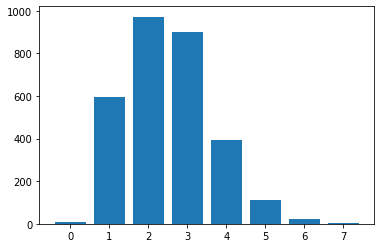

In [60]:
# Save the number of associated genres for each movie in a pandas series allnum_ag
allnum_ag = train.genres.apply(lambda x: len(x) if type(x) == list else 0)
# Sort and count all the unique number of associated genres
num_ag, counts = np.unique(allnum_ag, return_counts=True)
# Place this data into a dictionary
genre_counts = dict(zip(num_ag,counts))

import matplotlib.pyplot as plt

# Create a bar chart of the counted genres data
plt.bar(genre_counts.keys(), genre_counts.values())
plt.show()

Let's create our binary features next. Complete the following taks:
 
 
1.   Find the the 20 most common genres. 
2.   Transform the `genres` column by replacing its current entries with the list of names of genres occurring in the entries.  For example, the entry 
```
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
```
should be transformed into:
```
['Romance','Comedy']
```
Empty entries should be transformed into the empty list `[]`.
3. Create a separate column for each of the 20 most common genres, with name `genre_(nameofgenre) (e.g. `genre_Comedy`). A movie should have a 1 on a genre's column if the genre is one of the associated genres for that movie, and a 0 otherwise.
 
Don't iterate explicitly over the rows to perform these operations. Use in-built functions, such as `apply()`, or vectorisation.

In [61]:
# Remember to only run this part once, as it overwrites the train.genres.
# It goes from being a list of dictionaries to being a list of strings.

# Part 2 of this exercise.
def myfunc(x):
  return x['name']

train.genres = train.genres.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])

## Part 1 of this exercise. The explode() function converts the Series type to a list of singular entries which can then be counted
top20 = train.genres.explode().value_counts()
print(top20)

## Part 3
# For each genre in the top 20, we create the binary 0/1 depending if the genre is associated with the movie
# we then use the exec() function to create the columns and set them equal to the binary
# We then use the index (the name of the genre) from the top20 list to name the columns.
def CreateColumns(genre):
  a = train.genres.apply(lambda x: 1 if genre in x else 0)
  exec("train['genre_"+genre+"']=a")
  
pd.Series(top20.index).apply(lambda x: CreateColumns(x))

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
War                 100
Music               100
Documentary          87
Western              43
Foreign              31
TV Movie              1
Name: genres, dtype: int64


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

Visualise the number of movies per top 20 genre with a chart of your choice.

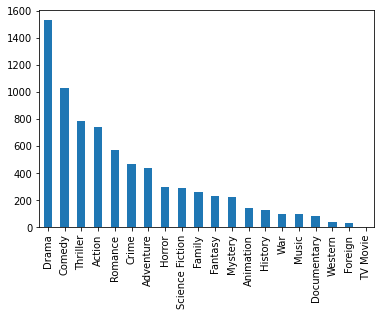

In [62]:
# Barchart of the top 20 genres
top20.plot.bar()

## Part 2: adding binary features for companies, crew and actors (5 pts)

You've now extracted binary features for all genres associated with a movie. When trying to predict whether a movie is a science fiction movie or not, knowing what other genres it is associated with may be useful. But there's other information that we could use to base our predictions. 

The `genres` column is just one out of several columns containing lists of dictionaries as entries. For example, the `production_companies` column also contains lists of dictionaries, providing names of the companies producing the movie. As you just did with genres, add new columns for:
 
1.   The names of the 30 most common production companies
2.   The names of the 30 most common production countries
3.   The names of the 30 most common actors (`cast` column) 
4.   The names of the 30 most common crew members
5.   The names of the 30 most common keywords
 
Don't iterate explicitly over to create these columns. Use `apply()` or vectorisation.

In [63]:
def myfunc(x):
  return x['name']

# First, we change the columns like we did in part 2 of the previous exercise
# Reminder that this means that this block can only be run once.
train.production_companies = train.production_companies.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])
train.production_countries = train.production_countries.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])
train.cast = train.cast.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])
train.crew = train.crew.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])
train.Keywords = train.Keywords.apply(lambda x: list(map(myfunc,x)) if type(x) == list else [])

# We then explode over the 5 different criteria
comp30 = train.production_companies.explode().value_counts().head(30)
country30 = train.production_countries.explode().value_counts().head(30)
cast30 = train.cast.explode().value_counts().head(30)
crew30 = train.crew.explode().value_counts().head(30)
key30 = train.Keywords.explode().value_counts().head(30)

# And change the function slightly for every criteria to create 150 new columns in our dataframa
def CreateColumns1(comp):
  a = train.production_companies.apply(lambda x: 1 if comp in x else 0)
  exec("train['production_Company_"+comp+"']=a")
  
pd.Series(comp30.index).apply(lambda x: CreateColumns1(x))

def CreateColumns2(country):
  a = train.production_countries.apply(lambda x: 1 if country in x else 0)
  exec("train['production_Country_"+country+"']=a")

pd.Series(country30.index).apply(lambda x: CreateColumns2(x))

def CreateColumns3(cast):
  a = train.cast.apply(lambda x: 1 if cast in x else 0)
  exec("train['cast_"+cast+"']=a")
  
pd.Series(cast30.index).apply(lambda x: CreateColumns3(x))

def CreateColumns4(crew):
  a = train.crew.apply(lambda x: 1 if crew in x else 0)
  exec("train['crew_"+crew+"']=a")
  
pd.Series(crew30.index).apply(lambda x: CreateColumns4(x))

def CreateColumns5(key):
  a = train.Keywords.apply(lambda x: 1 if key in x else 0)
  exec("train['Keywords_"+key+"']=a")
  
pd.Series(key30.index).apply(lambda x: CreateColumns5(x))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
dtype: object

Check the result. You should now have a much wider table, with the new columns consisting of binary features.

In [64]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_War,genre_Music,genre_Documentary,...,crew_Billy Hopkins,crew_Mindy Marin,crew_Danny Elfman,crew_Mark Isham,crew_Alan Silvestri,crew_Hans Bjerno,crew_Sarah Finn,crew_Neal H. Moritz,crew_Tim Bevan,crew_Marco Beltrami,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_sex,Keywords_suspense,Keywords_sequel,Keywords_love,Keywords_police,Keywords_teenager,Keywords_nudity,Keywords_female nudity,Keywords_drug,Keywords_prison,Keywords_high school,Keywords_musical,Keywords_los angeles,Keywords_new york,Keywords_family,Keywords_father son relationship,Keywords_investigation,Keywords_kidnapping
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a forme

 ## Part 3: adding numerical date features (10 points)

Next, we'll create some features based on the release date information. Create a new column storing the value for each of the following  aspects of a release date:
 
```
["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
```
 
As usual, you should use `apply()` or vectorisation to create these columns.

In [65]:
# Converts the release_date column to timestamps if they are not null
train.release_date = train.release_date.apply(lambda x: x if pd.isnull(x) else pd.Timestamp(x))

# Function that will create a new column in the data frame with some timestamp info, decided by the name
def CreateColumnsAsp(name):
  if name == 'weekday':
    exec('train["release_date_'+name+'"]=train.release_date.apply(lambda x: x if pd.isnull(x) else x.'+name+'())')
  else:
    exec('train["release_date_'+name+'"]=train.release_date.apply(lambda x: x if pd.isnull(x) else x.'+name+')')
# Define the list of names for the definition of the new columns
names = ['year','weekday','month','weekofyear','day','quarter']
# Creates the new columns we want
pd.Series(names).apply(lambda x: CreateColumnsAsp(x))

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

Next, we'll drop the columns that will not be used for learning. 

In [66]:
train = train.drop(['id','homepage', 'original_language','title', 'imdb_id','crew', 'poster_path', 'release_date', 'status','belongs_to_collection','Keywords','original_title','overview','production_companies','production_countries', 'spoken_languages', 'tagline', 'cast','genres'], axis=1)

Lastly, drop any rows with missing values.

In [67]:
train = train.dropna()

## Part 4: Prediction (10 pts)

Let's load the necessary `sklearn` libraries and prepare the training data for learning. Recall that your goal is to predict whether a movie has science fiction as an associated genre. So you're dealing with a binary classification task.

In [68]:
from sklearn.model_selection import train_test_split
import numpy as np

Use `sklearn` to prepare the training and test sets, setting aside 15% of the data for testing. Call the training input features, training labels, test input features and test labels as follows:

```
x_train, x_test, y_train, y_test
```



In [69]:
# target labels
y = train['genre_Science Fiction']
# input features
x = train.drop(['genre_Science Fiction'], axis=1)
# generate training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

Feature scaling is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Run the following code to feature scale your input data.

In [70]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

Check that the shape of your data looks correct.

In [71]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2548, 179) (2548,)
(450, 179) (450,)


Train a classifier of your choice. Then print the accuracy and confusion matrix over the validation set. You should be able to get around 90% accuracy, although the number of false negatives is likely to be quite high.

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
# Model initialization
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
# Train our model
mlp.fit(x_train, y_train)
# Use our model to predict
y_pred = mlp.predict(x_test)
print('Accuracy on test set:',accuracy_score(y_pred,y_test))

Accuracy on test set: 0.8911111111111111


# Exercise 4: Basic movie recommendation system (20 points)

In this exercise, you'll build a simple movie recommendation system.  The system will take a movie as input and recommend a list of similar movies. In order to recommend similar movies, you will use the correlation between the ratings of movies as a similarity metric. We'll use Pearson's correlation. 
 
The data for this exercise is available in the following URLs. It contains basic info about movies, as well as ratings provided by several users.

In [73]:
url1 = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/ratings.csv'
url2 = 'http://courses.compute.dtu.dk/02807/2020/projects/project1/movies.csv'

## Part 1: Preparing the ratings data (10 pts)

Read the data from these two URLs, and create a single dataframe from them, with the following columns:

| userId | movieId | rating | timestamp | title | genres |
|--------|---------|--------|-----------|-------|--------|
|        |         |        |           |       |        |

Call the dataframe `movie_data`.

In [74]:
# Create a dataframe from the first csv file
movie_data1 = pd.read_csv(url1)
# Create a dataframe from the second csv file
movie_data2 = pd.read_csv(url2)
# Merge the 2 dataframes into one
movie_data = pd.merge(movie_data1,movie_data2)

To find the correlation between the ratings of movies, create a dataframe where each column is a movie name and each row contains the rating assigned by a specific user to that movie. 

You'll notice that this dataframe has many NaN values, since each movie is not rated by every user. Call the dataframe `user_ratings`.

In [75]:
# Use pivot_table function to get a new dataframe containing the ratings of movies from specific users
user_ratings = movie_data.pivot_table(index='userId', columns='title', values='rating')

## Part 2: Finding the most similar movies (10 pts)

Each column contains all the user ratings for a particular movie. Let's take the user ratings for the movie Toy Story.

In [76]:
toystory_ratings = user_ratings['Toy Story (1995)']
toystory_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 610, dtype: float64

Next, find the correlation between the user ratings for Toy Story and the user ratings of all other movies. 
 
More specifically, create a dataframe that contains two columns, called `title` and `Correlation`. Each row should contain a movie title $x$, followed by the pairwise correlation between the column of ratings for Toy Story and the column of ratings for $x$.  Drop any rows with null values, and display the resulting dataframe.
 
Use in-built functions to compute correlations and avoid explicit loops.

In [77]:
# We use the apply function to compute the correlation with toystory_ratings and add it to a Data Frame
toystory_corr = pd.DataFrame(user_ratings.apply(lambda x: toystory_ratings.corr(x)))
# We drop nan values.
toystory_corr = toystory_corr.dropna()
# We fix the column names so it is ['title','Correlation']
toystory_corr.columns = ['Correlation']
toystory_corr = toystory_corr.reset_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Sort the movies by descending order of correlation to find out highly correlated movies at the top. Display the 5 most highly correlated movies.


In [78]:
# Sort the correlations by descending values
toystory_corr.sort_values(by=['Correlation'],ascending=False).head(5)

,title,Correlation
2383,Land Before Time III: The Time of the Great Gi...,1.0
1421,Faster Pussycat! Kill! Kill! (1965),1.0
176,Amen. (2002),1.0
2584,"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
4570,Waydowntown (2000),1.0


If you computed correlations correctly, you will find that the recommended movies are not very well known. We can generate more popular recommendations by finding highly correlated movies that have a sensible number of ratings. 
 
Add a column to your correlation table, called `rating_counts`, which stores the number of ratings received by each movie.

In [79]:
toystory_corr['rating_counts'] = pd.Series(toystory_corr.apply(lambda x: user_ratings[x.title].count(), axis=1))

Now find the 5 movies with the highest correlation with Toy Story, which have strictly more than 100 ratings. Display the result below. 

In [80]:
# Sort the correlations by descending values
toystory_corr.sort_values(by=['Correlation', 'rating_counts'],ascending=False).head(5)

,title,Correlation,rating_counts
4351,Toy Story (1995),1.0,215
1911,Higher Learning (1995),1.0,9
788,Chasing Liberty (2004),1.0,8
170,Altered States (1980),1.0,7
870,Cobb (1994),1.0,6
